# 9 Clustering

# 1. DBSCAN

Using DBSCAN iterate (for-loop) through different values of min_samples (1 to 10) and epsilon (.05 to .5, in steps of .01) to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for min_samples and epsilon. Plot one line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents min_samples, the other represents epsilon.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as Model
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

I worked on the Kiva (mpi region locations) dataset to find geographic clusters through the world of where Kiva provides loans. My objective was to see if DBSCAN could cluster towns/cities throughout the world to geographically represent the data on a map. First, I normalized the data because I didn't want larger longitudinal values biasing the data like altitude biased the Denmark road dataset from class. The dataset that I chose, represents geographic coordinates throughout the entire world so I thought normalizing the coordinates was a good idea. Overall, I do not believe I received a good results based on plotting the clusters vs. ideal (espilon/min_sample). It appears that possibly I need rescale the epsilon values based on scaling the geographic coordinates. The below scatterplot shows epsilon score on the x-axis and silhouette scores on the y-axis. I found that the best scores were between 0.15-0.19 (with 2 min samples), however, after visualizing the clusters, lower epsilon scores (0.07) performed much better. I found this by running the silo_scores.idxmax(axis=1) code below. Additionally, the below line chart shows 45 epsilon line values between 0.05 and 0.5 corresponding to their respective min_sample value with normalized data for a different visualization perspective. The y-axis shows the overall silhouette score of the line epsilon and it's respective min_sample score The data chart representing the various silhouette scores (epsilon and min_sample values) is listed below. Overall, I am not sure why the best silhouette score do not correspond with the best clusters graphed below. 

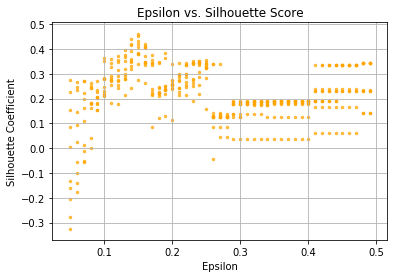

In [99]:
# plot the results
plt.scatter(epsilons, master_scores, alpha=.7, s=6, color='orange')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.title('Epsilon vs. Silhouette Score')
plt.grid(True)
plt.show()

Below is a very similar scatterplot as above; however, it focuses on the best epsilon values between 0.05 and 0.3. As you can see the best value is at 0.15.

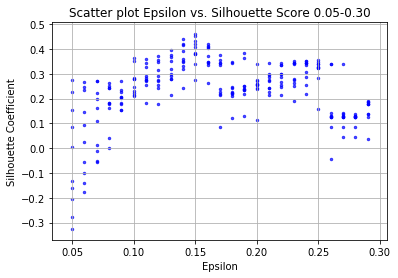

In [106]:
# plot the results
plt.scatter(epsilons2, master_scores2, alpha=.7, s=6, color='blue')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.title('Scatter plot Epsilon vs. Silhouette Score 0.05-0.30')
plt.grid(True)
plt.show()

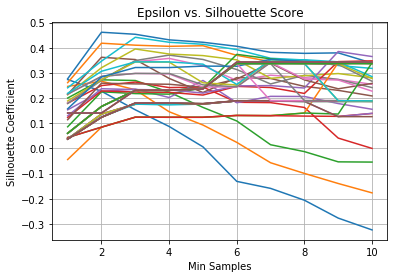

In [107]:
# plot the results
plt.figure()
plt.plot(k_range, silo_scores)
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Coefficient')
plt.title('Epsilon vs. Silhouette Score')
plt.grid(True)
plt.show()

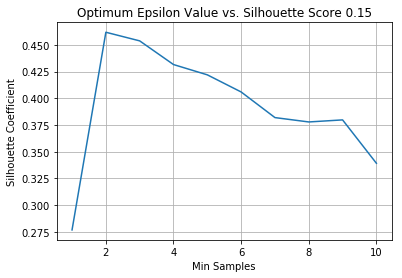

In [109]:
# plot the results
plt.figure()
plt.plot(k_range, silo_scores['Espilon_Score_0.15'])
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimum Epsilon Value vs. Silhouette Score 0.15')
plt.grid(True)
plt.show()

In [18]:
silo_scores.idxmax(axis=1)

0    Espilon_Score_0.15
1    Espilon_Score_0.15
2    Espilon_Score_0.15
3    Espilon_Score_0.15
4    Espilon_Score_0.15
5    Espilon_Score_0.15
6    Espilon_Score_0.15
7    Espilon_Score_0.15
8    Espilon_Score_0.19
9    Espilon_Score_0.19
dtype: object

In [19]:
silo_scores

,Espilon_Score_0.05,Espilon_Score_0.06,Espilon_Score_0.07,Espilon_Score_0.08,Espilon_Score_0.09,Espilon_Score_0.10,Espilon_Score_0.11,Espilon_Score_0.12,Espilon_Score_0.13,Espilon_Score_0.14,...,Espilon_Score_0.41,Espilon_Score_0.42,Espilon_Score_0.43,Espilon_Score_0.44,Espilon_Score_0.45,Espilon_Score_0.46,Espilon_Score_0.47,Espilon_Score_0.48,Espilon_Score_0.49,Espilon_Score_0.50
0,0.273686,0.246538,0.200277,0.179679,0.153334,0.214478,0.180724,0.178434,0.213633,0.240897,...,0.060108,0.060108,0.060108,0.060108,0.060108,0.060108,0.060108,0.140585,0.140585,0.140585
1,0.227174,0.267142,0.272712,0.249821,0.226648,0.362369,0.273903,0.270545,0.320853,0.346958,...,0.166753,0.166753,0.166753,0.166753,0.166753,0.166753,0.166753,0.140585,0.140585,0.140585
2,0.153451,0.233087,0.269890,0.263813,0.235907,0.353275,0.344800,0.349318,0.395260,0.441727,...,0.230811,0.230811,0.230811,0.230811,0.230811,0.230811,0.230811,0.231349,0.231349,0.231349
3,0.087265,0.145807,0.223522,0.241739,0.202337,0.278382,0.357811,0.370924,0.375174,0.421946,...,0.230811,0.230811,0.230811,0.230811,0.230811,0.230811,0.230811,0.231349,0.231349,0.231349
4,0.006268,0.093033,0.163031,0.244051,0.270243,0.222266,0.328893,0.353643,0.368980,0.413994,...,0.238319,0.238319,0.238319,0.238319,0.238319,0.238319,0.238319,0.236352,0.236352,0.236352
5,-0.131000,0.024032,0.109169,0.183461,0.181646,0.281299,0.270048,0.313590,0.352163,0.392804,...,0.337379,0.337379,0.337379,0.337379,0.337379,0.337379,0.337379,0.343360,0.343360,0.343360
6,-0.158876,-0.056975,0.014648,0.182060,0.207004,0.277985,0.291174,0.256270,0.278676,0.358421,...,0.189860,0.337379,0.337379,0.337379,0.337379,0.337379,0.337379,0.343360,0.343360,0.343360
7,-0.205931,-0.099376,-0.012721,0.162831,0.206436,0.246577,0.281219,0.290879,0.289065,0.351439,...,0.189860,0.189860,0.337379,0.337379,0.337379,0.337379,0.337379,0.343360,0.343360,0.343360
8,-0.277005,-0.139460,-0.053408,0.041061,0.178377,0.230819,0.274049,0.274179,0.297608,0.329527,...,0.189860,0.189860,0.189860,0.189860,0.337379,0.337379,0.337379,0.343360,0.343360,0.343360
9,-0.323991,-0.176707,-0.054347,0.000027,0.155589,0.208609,0.254884,0.241825,0.280371,0.318041,...,0.188943,0.188943,0.188943,0.188943,0.337379,0.337379,0.337379,0.343360,0.343360,0.343360


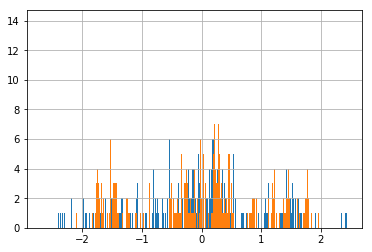

In [111]:
fig = plt.figure()
XX.lat.hist(bins=1000)
XX.lon.hist(bins=1000)

# Clustering your own data Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting.
You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots.

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected:

Metric Evaluation Plot Plots of the clustered data

According to my silhouette plots a espilon score of 0.15 and a min_sample value of 2 was the opitimum parameter for finding grouped clusters. I disagree with the metric based on the below 2D plot of the clusters. It appears that the model did not predict enough unique clusters where as if the espilon value was 0.07 and min_samples was 4 the model predicts much better (see second 2D plot below). It appears that smaller epsioon scores produce better clustering results!


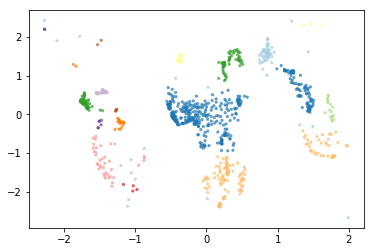

In [55]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.6, s=5, c=XX.cluster, cmap='Paired')

In [73]:
#This is the model for DBSCAN 
dbscan = DBSCAN(eps=0.07, min_samples=4)
XX.cluster1 = dbscan.fit_predict(XX[['lat','lon']])

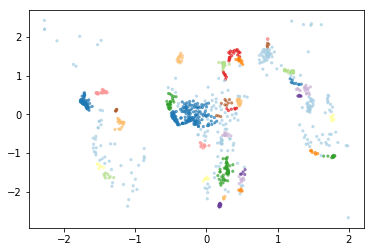

In [74]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.6, s=5, c=XX.cluster1, cmap='Paired')

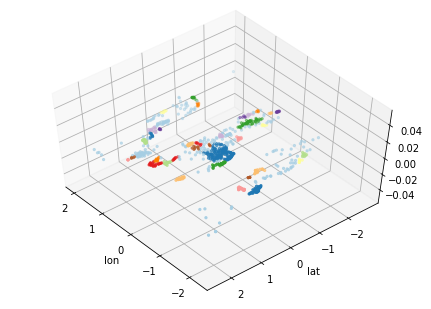

In [78]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=55, azim=140)

plt.cla()


ax.scatter(XX['lon'], XX['lat'], c=XX.cluster1, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
plt.show()

In [2]:
X = pd.read_csv('../data/kiva_mpi_region_locations.csv')
X.dropna(inplace=True) # I excluded over a thousand NAs from the dataset. 

In [24]:
#scaler = StandardScaler()

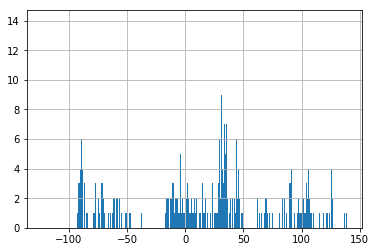

In [3]:
fig = plt.figure()
#X.lat.hist(bins=1000)
X.lon.hist(bins=1000)

In [4]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform([X.lon, X.lat])
#dbscan = DBSCAN(eps=0.05, min_samples=1)
#X.clustersw = dbscan.fit_predict(X_scaled)


In [5]:
#dbscan = DBSCAN(eps=0.05, min_samples=1)
#X.clustersw = dbscan.fit_predict(X_scaled)


This plot shows a preliminary evaluation of clusters of in the world.


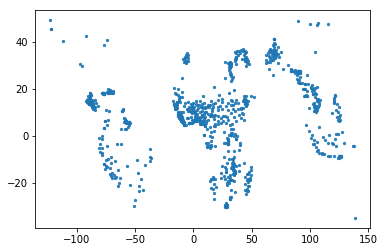

In [6]:
fig = plt.figure()
plt.scatter(X.lon, X.lat, alpha=.9, s=5, )

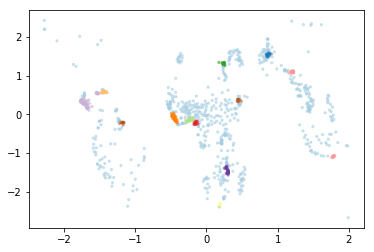

In [231]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.5, s=5, c=XX.cluster, cmap='Paired')

In [3]:
from sklearn.cluster import DBSCAN 

In [6]:
#This is the model for DBSCAN 
dbscan = DBSCAN(eps=0.05, min_samples=1)
X.cluster = dbscan.fit_predict(X[['lat','lon']])
X['cluster1'] = X.cluster

# This is the silhouette score without normalizing the data. 

In [7]:
from sklearn import metrics
metrics.silhouette_score(X[['lon', 'lat']], X.cluster)

0.041499333657225586

In [8]:
XX = X.copy()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

# This is an example of the difference in silhouette scores between unnormalized data above and normalized data below. 

In [7]:
dbscan = DBSCAN(eps=0.05, min_samples=1)
XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
XX['cluster1'] = XX.cluster


In [22]:
metrics.silhouette_score(XX[['lon', 'lat']], XX.cluster)

0.34336011909695474

# I created a for loop of min samples between 1 and 10 and epsilon values between 0.05 and 0.5. This loops creates ten unique silhouette scores for each respective epsilon value and stores them in an array.

In [112]:
epsilons = []
master_scores = []
for samp in range(1, 11):
    scores = []
    for eps in np.arange(.050, 0.5, .010):
        dbscan = DBSCAN(eps=eps, min_samples=samp)
        XX.clusters = dbscan.fit_predict(XX[['lat','lon']])
        score = (metrics.silhouette_score(XX[['lon', 'lat']], XX.clusters))
        #print (score)
        scores.append(score)
        epsilons.append(eps)
    master_scores.append(scores)

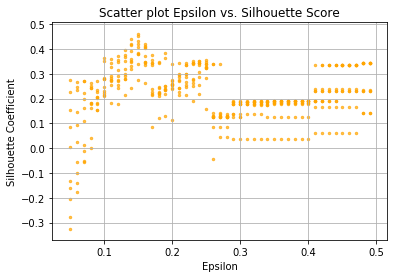

In [113]:
# plot the results
plt.scatter(epsilons, master_scores, alpha=.7, s=6, color='orange')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.title('Scatter plot Epsilon vs. Silhouette Score')
plt.grid(True)
plt.show()

In [114]:
epsilons2 = []
master_scores2 = []
for samp in range(1, 11):
    scores = []
    for eps in np.arange(.050, 0.3, .010):
        dbscan = DBSCAN(eps=eps, min_samples=samp)
        XX.clusters = dbscan.fit_predict(XX[['lat','lon']])
        score = (metrics.silhouette_score(XX[['lon', 'lat']], XX.clusters))
        #print (score)
        scores.append(score)
        epsilons2.append(eps)
    master_scores2.append(scores)

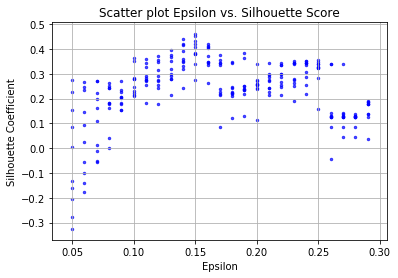

In [115]:
# plot the results
plt.scatter(epsilons2, master_scores2, alpha=.7, s=6, color='blue')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.title('Scatter plot Epsilon vs. Silhouette Score')
plt.grid(True)
plt.show()

In [9]:
silo_scores = pd.read_csv('../data/silo_scores.csv')

In [10]:
silo_scores2 = pd.read_csv('../data/min_samples.csv')

In [11]:
silo_scores.idxmax(axis=1)

0    Espilon_Score_0.15
1    Espilon_Score_0.15
2    Espilon_Score_0.15
3    Espilon_Score_0.15
4    Espilon_Score_0.15
5    Espilon_Score_0.15
6    Espilon_Score_0.15
7    Espilon_Score_0.15
8    Espilon_Score_0.19
9    Espilon_Score_0.19
dtype: object

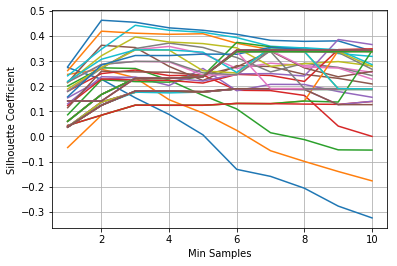

In [14]:
# plot the results
plt.figure()
plt.plot(k_range, silo_scores)
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

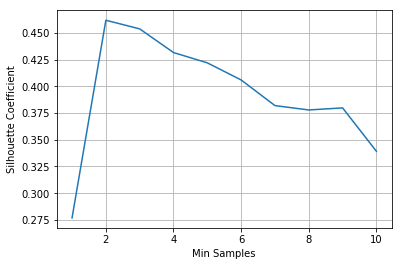

In [394]:
# plot the results
plt.figure()
plt.plot(k_range, silo_scores['Espilon_Score_0.15'])
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

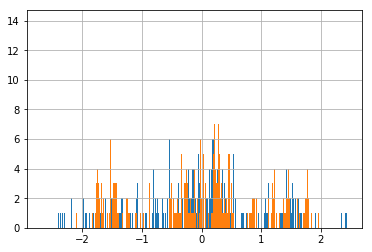

In [337]:
fig = plt.figure()
XX.lat.hist(bins=1000)
XX.lon.hist(bins=1000)

In [45]:
dbscan = DBSCAN(eps=0.15, min_samples=2)
XX.cluster = dbscan.fit_predict(XX[['lon','lat']])
XX['cluster'] = dbscan.fit_predict(XX[['lon','lat']])

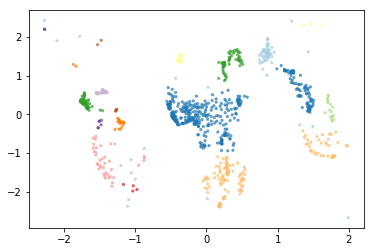

In [46]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.6, s=5, c=XX.cluster, cmap='Paired')

2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting.

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots.

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected:

Metric Evaluation Plot
Plots of the clustered data

In [17]:
import sys

In [ ]:
ran

In [86]:
epsilons = []
master_scores = []
for samp in range(1, 11):
    scores = []
    for eps in np.arange(.050, 0.5, .010):
        dbscan = DBSCAN(eps=eps, min_samples=samp)
        XX.clusters = dbscan.fit_predict(XX[['lat','lon']])
        score = (metrics.silhouette_score(XX[['lon', 'lat']], XX.clusters))
        #print (score)
        scores.append(score)
        epsilons.append(eps)
    master_scores.append(scores)

In [85]:
master_scores

[]


Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the data/ folder, such as beers.csv, snow_tweets.csv, data/USCensus1990.data.txt.gz. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.